# Scan LSST aerosols during 10 years

- Author :Sylvie Dagoret-Campagne
- affiliation : LAL,IN2P3,CNRS
- organization : LSST 

- creation : Tuesday 2nd May 2016
- update : Tuesday 17th May 2016

Plot aerosols and humidity versus years 


In [189]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import h5py
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import libCaliopAOD as cal

In [190]:
import air
import humidity as hum

In [191]:
#from __future__ import print_function
import datetime
from matplotlib.dates import YearLocator,MonthLocator, WeekdayLocator,DateFormatter
from matplotlib.dates import MONDAY

In [192]:
mondays = WeekdayLocator(MONDAY)
months = MonthLocator(range(1, 13), bymonthday=1, interval=1)
monthsFmt = DateFormatter("%b '%y")

In [193]:
years= YearLocator()
yearsFmt=DateFormatter("%Y")

In [194]:
year_start=2007   # choose the month number
year_stop=2015   # choose the month number
month_start=0      # choose first month
month_stop=11      # choose last month
month_numbers=np.arange(month_start,month_stop+1)
month_stringnumber=['01','02','03','04','05','06','07','08','09','10','11','12']

In [195]:
path_root='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/CALIPSO/DATA/ICARE/CALIOP/L3/CAL_LID_L3_APro_AllSky.v3.00/CAL_LID_L3_APro_AllSky.v3.00'

In [196]:
filename_base='CAL_LID_L3_APro_AllSky-Standard-V3-00' # 

In [197]:
nb_of_years=year_stop-year_start+1                               # number of years   
number_of_monthes_per_year=month_numbers.shape[0]               # number of months per year
total_number_of_monthes=number_of_monthes_per_year*nb_of_years  # total number of monthes over years

### defines constants

In [198]:
data_dates=np.array(datetime.date(year_start,month_start+1,1))

In [199]:
path_root='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/CALIPSO/DATA/ICARE/CALIOP/L3/CAL_LID_L3_APro_AllSky.v3.00/CAL_LID_L3_APro_AllSky.v3.00'
fullpath_root=os.path.join(os.path.join(path_root,str(2007)),'hdf5')
filename_base='CAL_LID_L3_APro_AllSky-Standard-V3-00' 

In [200]:

dayfile_fullname=cal.GetL3FilenameDay(path_root,filename_base,year_start,month_start)
nightfile_fullname=cal.GetL3FilenameNight(path_root,filename_base,year_start,month_start)
dayfiles_fullname=np.array(dayfile_fullname)
nightfiles_fullname=np.array(nightfile_fullname)

print 'first day file = ', dayfile_fullname
print 'first night file = ', nightfile_fullname

first day file =  /Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/CALIPSO/DATA/ICARE/CALIOP/L3/CAL_LID_L3_APro_AllSky.v3.00/CAL_LID_L3_APro_AllSky.v3.00/2007/hdf5/CAL_LID_L3_APro_AllSky-Standard-V3-00.2007-01D.h5
first night file =  /Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/CALIPSO/DATA/ICARE/CALIOP/L3/CAL_LID_L3_APro_AllSky.v3.00/CAL_LID_L3_APro_AllSky.v3.00/2007/hdf5/CAL_LID_L3_APro_AllSky-Standard-V3-00.2007-01N.h5


In [201]:
# initialize the data container for AOD
aod_day_first=cal.GetL3Value(dayfile_fullname,'AOD_Mean')
aod_night_first=cal.GetL3Value(nightfile_fullname,'AOD_Mean')
aod_day_coll=np.array(aod_day_first)
aod_night_coll=np.array(aod_night_first)

In [202]:
# initialize the data container for Humidity during the day
vec_temperatures_day=cal.GetL3Value(dayfile_fullname,'Temperature_Mean') # vector quantities
vec_pressures_day=cal.GetL3Value(dayfile_fullname,'Pressure_Mean')
vec_rhumidity_day=cal.GetL3Value(dayfile_fullname,'Relative_Humidity_Mean')
# initialize the data container for Humidity during the night
vec_temperatures_night=cal.GetL3Value(nightfile_fullname,'Temperature_Mean') # vector quantities
vec_pressures_night=cal.GetL3Value(nightfile_fullname,'Pressure_Mean')
vec_rhumidity_night=cal.GetL3Value(nightfile_fullname,'Relative_Humidity_Mean')
altitudes=cal.GetL3APAltitudes()
thealtitudes=altitudes[0:len(vec_temperatures_day)]

# calculation or precipitable water in each slice during the day
pwv_day=hum.rh2ah(vec_rhumidity_day/100.,vec_pressures_day*100.,vec_temperatures_day+273.)*60. # don't know why need to devide by 10 ???
pwvcut_day=pwv_day
pwvcut_day[np.where(thealtitudes<2.68)]=0
sumpwv_day=np.sum(pwvcut_day)

# calculation or precipitable water in each slice during the night
pwv_night=hum.rh2ah(vec_rhumidity_night/100.,vec_pressures_night*100.,vec_temperatures_night+273.)*60./10 # don't know why need to devide by 10 ???
pwvcut_night=pwv_night
pwvcut_night[np.where(thealtitudes<2.68)]=0
sumpwv_night=np.sum(pwvcut_night)

# define the collections
pwv_day_coll=np.array(sumpwv_day)
pwv_night_coll=np.array(sumpwv_night)

### defines the list of dates and filenames for days and night

In [203]:
for year in range(2007,2016,1):
    fullpath_root=os.path.join(os.path.join(path_root,str(2007)),'hdf5')   
    for month in range(1,13):
        if not (year == 2007 and month ==1):
            # retreive the filename
            newdayfile=cal.GetL3FilenameDay(path_root,filename_base,year,month-1)
            newnightfile=cal.GetL3FilenameNight(path_root,filename_base,year,month-1)
            # extract the AOD value
            newdayaod=cal.GetL3Value(newdayfile,'AOD_Mean')
            newnightaod=cal.GetL3Value(newnightfile,'AOD_Mean')
            # extract the humidity, Temperature and pressure vectors 
            
            # initialize the data container for Humidity during the day
            vec_temperatures_day=cal.GetL3Value(newdayfile,'Temperature_Mean') # vector quantities
            vec_pressures_day=cal.GetL3Value(newdayfile,'Pressure_Mean')
            vec_rhumidity_day=cal.GetL3Value(newdayfile,'Relative_Humidity_Mean')
            # initialize the data container for Humidity during the night
            vec_temperatures_night=cal.GetL3Value(newnightfile,'Temperature_Mean') # vector quantities
            vec_pressures_night=cal.GetL3Value(newnightfile,'Pressure_Mean')
            vec_rhumidity_night=cal.GetL3Value(newnightfile,'Relative_Humidity_Mean')
            
            if(year>=2014 or ( year>=2013 and month>2 )):
                vec_rhumidity_day=vec_rhumidity_day*100.
                vec_rhumidity_night=vec_rhumidity_night*100.
            
            altitudes=cal.GetL3APAltitudes()
            thealtitudes=altitudes[0:len(vec_temperatures_day)]

            # calculation or precipitable water in each slice during the day
            pwv_day=hum.rh2ah(vec_rhumidity_day/100.,vec_pressures_day*100.,vec_temperatures_day+273.)*60. # don't know why need to devide by 10 ???
            pwvcut_day=pwv_day
            pwvcut_day[np.where(thealtitudes<2.68)]=0
            sumpwv_day=np.sum(pwvcut_day)

            # calculation or precipitable water in each slice during the night
            pwv_night=hum.rh2ah(vec_rhumidity_night/100.,vec_pressures_night*100.,vec_temperatures_night+273.)*60. # don't know why need to devide by 10 ???
            pwvcut_night=pwv_night
            pwvcut_night[np.where(thealtitudes<2.68)]=0
            sumpwv_night=np.sum(pwvcut_night)
            
            
            
            # append the filename
            dayfiles_fullname=np.append(dayfiles_fullname,newdayfile)
            nightfiles_fullname=np.append(nightfiles_fullname,newnightfile)
            # append the date
            data_dates= np.append( data_dates , datetime.date(year,month,1))
            # append the AOD
            aod_day_coll=np.append(aod_day_coll,newdayaod)
            aod_night_coll=np.append(aod_night_coll,newnightaod)
            # append the pwv
            pwv_day_coll=np.append(pwv_day_coll,sumpwv_day)
            pwv_night_coll=np.append(pwv_night_coll,sumpwv_night)
            
            

In [204]:
print data_dates.shape
print aod_day_coll.shape
print aod_night_coll.shape
print pwv_day_coll
print pwv_night_coll

(108,)
(108,)
(108,)
[ 5.46235371  3.44402695  2.65834045  3.79086733  2.42237496  2.58029342
  3.83889866  2.34096408  1.97912693  2.65844059  3.32880449  3.3580637
  3.68199778  4.05950356  3.12666655  3.16950107  4.47289896  2.43613148
  3.55770063  4.75049162  2.20186067  2.81812048  3.16112161  3.35243511
  4.58150625  3.32947731  4.64988279  3.71418357  5.59486914  2.52613211
  1.87035227  3.61448908  2.11263824  4.42993164  3.57001972  3.00953817
  5.93067169  3.51080561  2.81639099  4.73157024  5.32118702  2.52464366
  1.75667191  2.20620084  2.1757288   2.36153603  2.44681573  2.5354054
  2.64368629  5.86332369  6.11021376  2.05134034  2.70723462  2.50842667
  4.39969158  2.68225813  5.43220472  2.6241045   2.13343906  4.17215872
  2.73807096  6.33100891  3.05742526  3.82785654  3.44692945  2.29968548
  2.71077561  2.35572481  2.68761826  3.34254551  2.00193405  3.83879924
  5.90844917  3.88674641  3.89147687  2.7865839   3.82390022  3.50366735
  2.72165442  2.99731779  3.3585

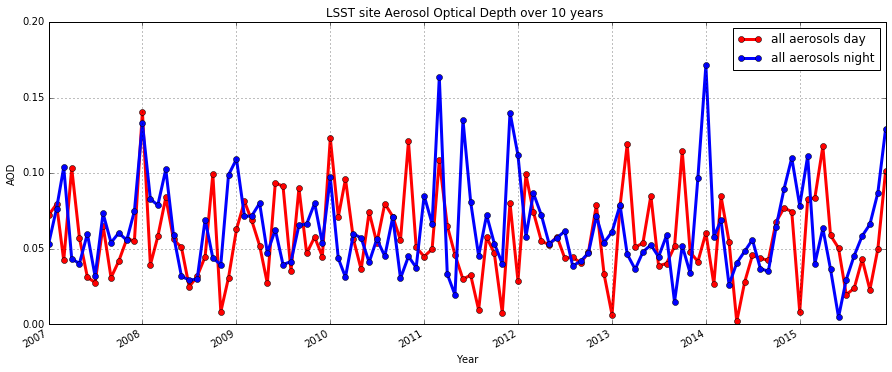

In [205]:
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,1,1)



#ax.plot_date(dates, all_aod_day,'r-',drawstyle='steps-post',label='all aerosols day',linewidth=3)
#ax.plot_date(dates, all_aod_night,'b-',drawstyle='steps-post',label='all aerosols day',linewidth=3)

ax.plot_date(data_dates, aod_day_coll,'ro-',label='all aerosols day',linewidth=3)
ax.plot_date(data_dates, aod_night_coll,'bo-',label='all aerosols night',linewidth=3)

#ax.xaxis.set_major_locator(months)
#ax.xaxis.set_major_formatter(monthsFmt)

#ax.xaxis.set_minor_locator(mondays)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

title= "LSST site Aerosol Optical Depth over 10 years "
figfilename="Images/LSSTAODvsMonth10Y.pdf" 

ax.set_ylabel('AOD')
ax.set_xlabel('Year')

ax.grid(True)
fig.autofmt_xdate()

plt.title(title)
#plt.lines.Line2D.set_linewidth(2.)
plt.ylim(0,0.2)
plt.legend(loc='best')
plt.savefig(figfilename, bbox_inches='tight')

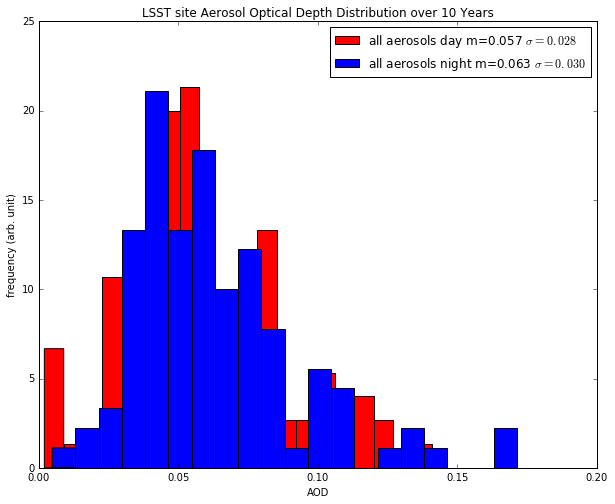

In [206]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)

themean_aod_day=aod_day_coll.mean()
themean_aod_night=aod_night_coll.mean()
therms_aod_day=aod_day_coll.std()
therms_aod_night=aod_night_coll.std()

label_day='all aerosols day m=%4.3f $\sigma =%4.3f $' % (themean_aod_day,therms_aod_day)
label_night='all aerosols night m=%4.3f $\sigma =%4.3f $' % (themean_aod_night,therms_aod_night)

ax.hist(aod_day_coll,bins=20, facecolor='r',normed=1,label=label_day)
ax.hist(aod_night_coll,bins=20, facecolor='b',normed=1,label=label_night)
plt.xlim(0,0.2)
ax.set_ylabel('frequency (arb. unit)')
ax.set_xlabel('AOD')
title= "LSST site Aerosol Optical Depth Distribution over 10 Years"
figfilename="Images/DistTribLSSTAOD10Y.pdf" 
ax.set_title(title)
plt.legend(loc='best')
plt.savefig(figfilename, bbox_inches='tight')

## Pandas collection

In [207]:
data_dict = {'dates': data_dates, 'AOD_days': aod_day_coll, 'AOD_nights': aod_night_coll}

In [208]:
dataset=pd.DataFrame(data_dict,columns={'dates','AOD_days','AOD_nights'})

In [209]:
dataset.describe()

,AOD_nights,AOD_days
count,108.000000,108.000000
mean,0.062986,0.057488
std,0.029850,0.028127
min,0.004760,0.001937
25%,0.041767,0.040534
50%,0.057623,0.053263
75%,0.075387,0.075217
max,0.171333,0.140762


In [210]:
dataset.head()

,AOD_nights,dates,AOD_days
0,0.053129,2007-01-01,0.072230
1,0.076607,2007-02-01,0.079548
2,0.103868,2007-03-01,0.042279
3,0.043427,2007-04-01,0.103347
4,0.040217,2007-05-01,0.057246


In [211]:
dataset.tail()

,AOD_nights,dates,AOD_days
103,0.045498,2015-08-01,0.023894
104,0.058503,2015-09-01,0.043053
105,0.066179,2015-10-01,0.022889
106,0.087038,2015-11-01,0.049933
107,0.129083,2015-12-01,0.101236


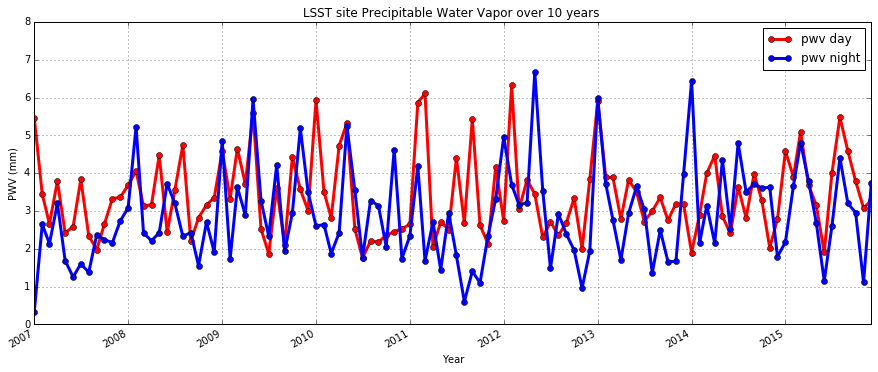

In [212]:
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,1,1)



#ax.plot_date(dates, all_aod_day,'r-',drawstyle='steps-post',label='all aerosols day',linewidth=3)
#ax.plot_date(dates, all_aod_night,'b-',drawstyle='steps-post',label='all aerosols day',linewidth=3)

ax.plot_date(data_dates, pwv_day_coll,'ro-',label='pwv day',linewidth=3)
ax.plot_date(data_dates, pwv_night_coll,'bo-',label='pwv night',linewidth=3)

#ax.xaxis.set_major_locator(months)
#ax.xaxis.set_major_formatter(monthsFmt)

#ax.xaxis.set_minor_locator(mondays)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

title= "LSST site Precipitable Water Vapor over 10 years "
figfilename="Images/LSSTPWVvsMonth10Y.pdf" 

ax.set_ylabel('PWV (mm)')
ax.set_xlabel('Year')

ax.grid(True)
fig.autofmt_xdate()

plt.title(title)
#plt.lines.Line2D.set_linewidth(2.)
plt.ylim(0,8.)
plt.legend(loc='best')
plt.savefig(figfilename, bbox_inches='tight')

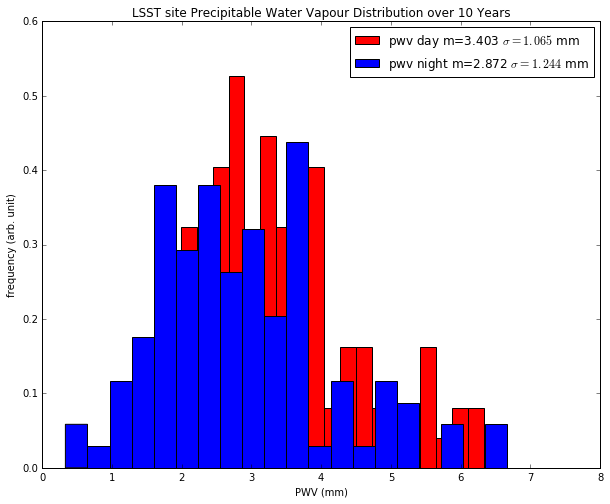

In [217]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)

themean_pwv_day=pwv_day_coll.mean()
themean_pwv_night=pwv_night_coll.mean()
therms_pwv_day=pwv_day_coll.std()
therms_pwv_night=pwv_night_coll.std()

label_day='pwv day m=%4.3f $\sigma =%4.3f $ mm' % (themean_pwv_day,therms_pwv_day)
label_night='pwv night m=%4.3f $\sigma =%4.3f $ mm' % (themean_pwv_night,therms_pwv_night)

ax.hist(pwv_day_coll,bins=20, facecolor='r',normed=1,label=label_day)
ax.hist(pwv_night_coll,bins=20, facecolor='b',normed=1,label=label_night)
plt.xlim(0,8.0)
ax.set_ylabel('frequency (arb. unit)')
ax.set_xlabel('PWV (mm)')
title= "LSST site Precipitable Water Vapour Distribution over 10 Years"
figfilename="Images/DistTribLSSTPWV10Y.pdf" 
ax.set_title(title)
plt.legend(loc='best')
plt.savefig(figfilename, bbox_inches='tight')

# Pandas collection for PWV

In [218]:
data_dict2 = {'dates': data_dates, 'PWV_days': pwv_day_coll, 'PWV_nights': pwv_night_coll}

In [219]:
dataset2=pd.DataFrame(data_dict2,columns={'dates','PWV_days','PWV_nights'})

In [220]:
dataset2.describe()

,PWV_days,PWV_nights
count,108.000000,108.000000
mean,3.403296,2.872493
std,1.069851,1.250200
min,1.756672,0.332454
25%,2.638791,1.941136
50%,3.236731,2.698967
75%,3.895812,3.614878
max,6.331009,6.668858
